# **Three day Forex Price Prediction**

#**Using Model** 
####RNN(Recurrent Neural Network)
####LSTM(Long Short Term Memory)
####GRU(Gated Recurrent Unit)


In [1]:
import numpy
import pandas
import pandas as pd
import pandas as np
import numpy as np
import csv
import math
import datetime
import scipy
import tqdm
import keras
import pandas_datareader as web
from numpy import nan
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import seaborn as seabornInstance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import GRU
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


In [2]:
df_1_3d = pd.read_csv('EURUSD_Price.csv', parse_dates=True, index_col=0)
df_1_3d.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2003-12-01  1.203398  1.204007  1.194401  1.196501   1.196501     0.0
2003-12-02  1.196101  1.210903  1.194600  1.208897   1.208897     0.0
2003-12-03  1.209000  1.213003  1.207700  1.212298   1.212298     0.0
2003-12-04  1.212004  1.214403  1.204398  1.208094   1.208094     0.0
2003-12-05  1.207802  1.219096  1.206593  1.218695   1.218695     0.0

In [3]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_1_3d = df_1_3d.resample('3D').agg(agg_dict)

In [4]:
print(df_1_3d.head(10))
print('---------')
print(df_1_3d.tail(10))


                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2003-12-01  1.203398  1.213003  1.194401  1.212298   1.212298     0.0
2003-12-04  1.212004  1.219096  1.204398  1.218695   1.218695     0.0
2003-12-07  1.216797  1.227702  1.215407  1.224995   1.224995     0.0
2003-12-10  1.224905  1.230603  1.212298  1.227898   1.227898     0.0
2003-12-13  1.218695  1.232499  1.217804  1.231997   1.231997     0.0
2003-12-16  1.231406  1.244199  1.229997  1.242298   1.242298     0.0
2003-12-19  1.242205  1.243503  1.235102  1.238497   1.238497     0.0
2003-12-22  1.235697  1.267202  1.235697  1.245299   1.245299     0.0
2003-12-25  1.245702  1.247100  1.242699  1.243194   1.243194     0.0
2003-12-28  1.243394  1.256297  1.242993  1.254894   1.254894     0.0
---------
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2021-06-29

In [5]:
df_1_3d.shape

(2150, 6)

In [6]:
df_1_3d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2150 entries, 2003-12-01 to 2021-07-26
Freq: 3D
Data columns (total 6 columns):
Open         2134 non-null float64
High         2134 non-null float64
Low          2134 non-null float64
Close        2134 non-null float64
Adj Close    2134 non-null float64
Volume       2134 non-null float64
dtypes: float64(6)
memory usage: 197.6 KB


In [9]:
df_1_3d.describe()

Open         High          Low        Close    Adj Close  Volume
count  2134.000000  2134.000000  2134.000000  2134.000000  2134.000000  2134.0
mean      1.258977     1.266215     1.250768     1.258981     1.258981     0.0
std       0.119946     0.120995     0.121409     0.119743     0.119743     0.0
min       1.041775     1.047011     0.072902     1.039047     1.039047     0.0
25%       1.161741     1.166549     1.154751     1.162223     1.162223     0.0
50%       1.253958     1.262761     1.246867     1.255217     1.255217     0.0
75%       1.344393     1.351255     1.335818     1.343973     1.343973     0.0
max       1.598184     1.602821     1.584610     1.598798     1.598798     0.0

In [10]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_1_3d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_1_3d.apply(num_missing, axis=1).head())

Missing values per column:
Open         16
High         16
Low          16
Close        16
Adj Close    16
Volume       16
dtype: int64

Missing values per row:
Date
2003-12-01    0
2003-12-04    0
2003-12-07    0
2003-12-10    0
2003-12-13    0
Freq: 3D, dtype: int64


In [12]:
df_1_3d["Open"].fillna("1.258977", inplace = True)
df_1_3d["High"].fillna("1.266215", inplace = True)
df_1_3d["Low"].fillna("1.250768", inplace = True)
df_1_3d["Close"].fillna("1.258981", inplace = True)
df_1_3d["Adj Close"].fillna("1.258981", inplace = True)
df_1_3d["Volume"].fillna("0.0", inplace = True)
print(df_1_3d.head(10))
print(df_1_3d.tail(10))

               Open    High      Low    Close Adj Close Volume
Date                                                          
2003-12-01   1.2034   1.213   1.1944   1.2123    1.2123      0
2003-12-04    1.212  1.2191   1.2044   1.2187    1.2187      0
2003-12-07   1.2168  1.2277  1.21541    1.225     1.225      0
2003-12-10   1.2249  1.2306   1.2123   1.2279    1.2279      0
2003-12-13   1.2187  1.2325   1.2178    1.232     1.232      0
2003-12-16  1.23141  1.2442     1.23   1.2423    1.2423      0
2003-12-19  1.24221  1.2435   1.2351   1.2385    1.2385      0
2003-12-22   1.2357  1.2672   1.2357   1.2453    1.2453      0
2003-12-25   1.2457  1.2471   1.2427  1.24319   1.24319      0
2003-12-28  1.24339  1.2563  1.24299  1.25489   1.25489      0
               Open     High      Low    Close Adj Close Volume
Date                                                           
2021-06-29  1.19303  1.19303  1.18381  1.18568   1.18568      0
2021-07-02  1.18471   1.1861  1.18193  1.18462   1.1

In [13]:
#df_1_3d = df_1_3d.dropna(how='any',axis=0) 
#df_1_3d.tail(10)

In [14]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_1_3d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_1_3d.apply(num_missing, axis=1).head())

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
Date
2003-12-01    0
2003-12-04    0
2003-12-07    0
2003-12-10    0
2003-12-13    0
Freq: 3D, dtype: int64


In [15]:
#df_1_3d["Open"].fillna("1.258977", inplace = True)
#df_1_3d["High"].fillna("1.266215", inplace = True)
#df_1_3d["Low"].fillna("1.250768", inplace = True)
#df_1_3d["Close"].fillna("1.258981", inplace = True)
#df_1_3d["Adj Close"].fillna("1.258981", inplace = True)
#df_1_3d["Volume"].fillna("0.0", inplace = True)
#print(df_1_3d.head(10))
#print(df_1_3d.tail(10))

In [16]:
df_1_3d.shape

(2150, 6)

**Open, High, Low, Close Price History in Plot**

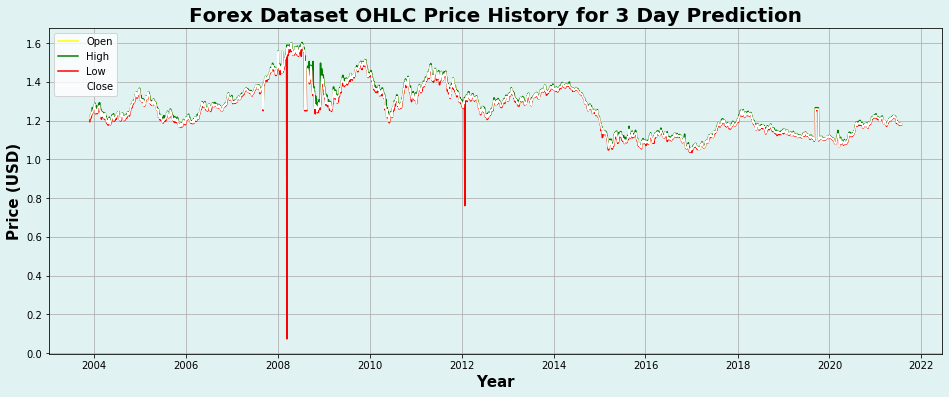

In [20]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
plt.plot(df_1_3d["Open"], color = 'yellow')
plt.plot(df_1_3d["High"], color = 'green')
plt.plot(df_1_3d["Low"], color = 'red')
plt.plot(df_1_3d["Close"],color = 'white')
plt.title('Forex Dataset OHLC Price History for 3 Day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Year',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History in Plot**

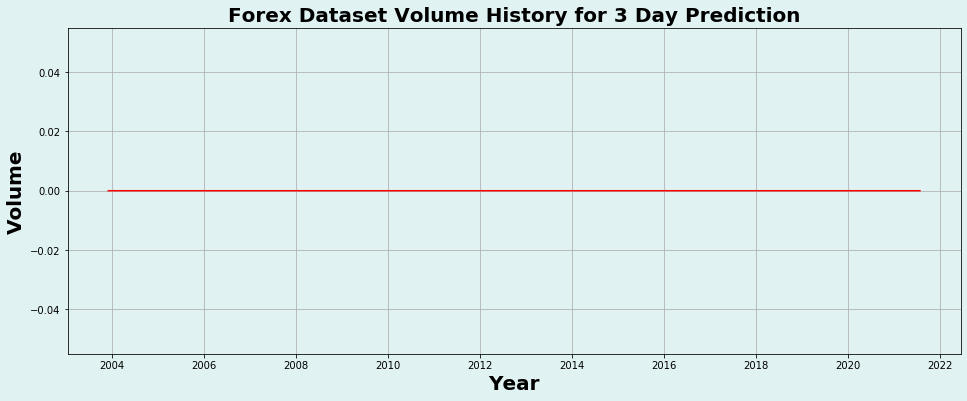

In [21]:
  #plt.figure()
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
plt.plot(df_1_3d["Volume"], color = 'red')
plt.title('Forex Dataset Volume History for 3 Day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Year', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

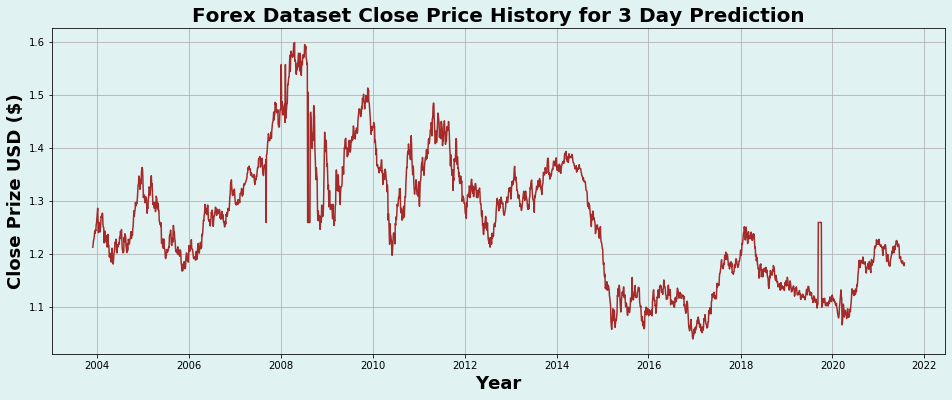

In [22]:
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
plt.title('Forex Dataset Close Price History for 3 Day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df_1_3d['Close'], color = 'brown')
plt.xlabel("Year" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

#plt.plot(y_test, color = 'red', label = 'Real HMC Stock Price')

In [23]:
training_1 = df_1_3d[df_1_3d.index < datetime.datetime(year=2018, month=1, day=11)]
training_1

Open     High      Low    Close Adj Close Volume
Date                                                           
2003-12-01   1.2034    1.213   1.1944   1.2123    1.2123      0
2003-12-04    1.212   1.2191   1.2044   1.2187    1.2187      0
2003-12-07   1.2168   1.2277  1.21541    1.225     1.225      0
2003-12-10   1.2249   1.2306   1.2123   1.2279    1.2279      0
2003-12-13   1.2187   1.2325   1.2178    1.232     1.232      0
...             ...      ...      ...      ...       ...    ...
2017-12-29  1.19399  1.20228   1.1938  1.19417   1.19417      0
2018-01-01   1.2005  1.20809   1.1999  1.20635   1.20635      0
2018-01-04  1.20113  1.20919   1.2005  1.20688   1.20688      0
2018-01-07  1.20395   1.2054   1.1918  1.19705   1.19705      0
2018-01-10  1.19293  1.21561  1.19245  1.20421   1.20421      0

[1719 rows x 6 columns]

In [24]:
testing_1 = df_1_3d[df_1_3d.index >= datetime.datetime(year=2018, month=1, day=11)]
testing_1

Open     High      Low    Close Adj Close Volume
Date                                                           
2018-01-13   1.2193   1.2299  1.21881  1.21923   1.21923      0
2018-01-16  1.22699  1.23215  1.21751   1.2184    1.2184      0
2018-01-19  1.22359  1.22948  1.22203  1.22366   1.22366      0
2018-01-22  1.22559   1.2402  1.22146  1.23103   1.23103      0
2018-01-25   1.2396  1.25299  1.23865  1.23923   1.23923      0
...             ...      ...      ...      ...       ...    ...
2021-07-14  1.17744  1.18511  1.17726  1.18118   1.18118      0
2021-07-17  1.18115  1.18233  1.17643   1.1814    1.1814      0
2021-07-20  1.17925  1.18298  1.17536  1.17927   1.17927      0
2021-07-23  1.17736  1.17855   1.1756  1.17727   1.17727      0
2021-07-26   1.1773  1.18245  1.17646  1.18245   1.18245      0

[431 rows x 6 columns]

**Training & Testing Conbination**

<function matplotlib.pyplot.show(*args, **kw)>

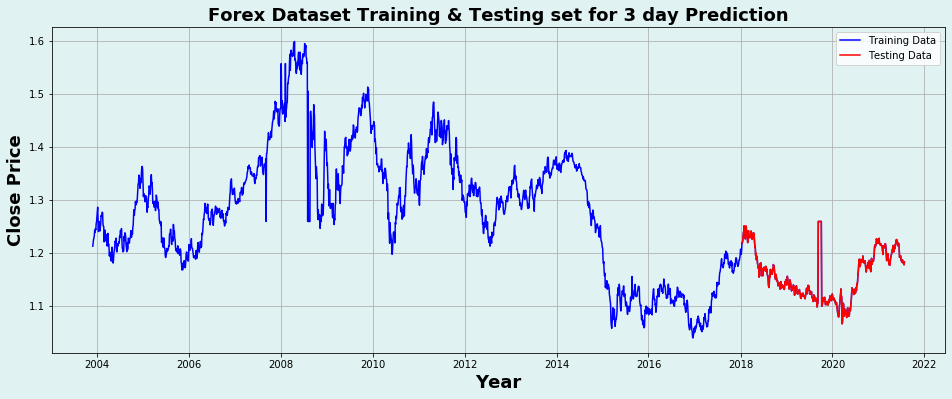

In [26]:
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
training_1, testing_1 =  df_1_3d[ df_1_3d.index < datetime.datetime(year=2018, month=1, day=11)],  df_1_3d[ df_1_3d.index >= datetime.datetime(year=2018, month=1, day=11)]
#plt.figure(figsize=(12,7))
plt.title('Forex Dataset Training & Testing set for 3 day Prediction', fontsize = 18,fontweight = "bold")
plt.xlabel('Year' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price', fontsize = 18,fontweight = "bold")
plt.plot( df_1_3d['Close'], 'blue', label='Training Data')
plt.plot(testing_1['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [27]:
training_length_1 = training_1.filter(['Close'])
training_length_1

Close
Date               
2003-12-01   1.2123
2003-12-04   1.2187
2003-12-07    1.225
2003-12-10   1.2279
2003-12-13    1.232
...             ...
2017-12-29  1.19417
2018-01-01  1.20635
2018-01-04  1.20688
2018-01-07  1.19705
2018-01-10  1.20421

[1719 rows x 1 columns]

In [28]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-13  1.21923
2018-01-16   1.2184
2018-01-19  1.22366
2018-01-22  1.23103
2018-01-25  1.23923
...             ...
2021-07-14  1.18118
2021-07-17   1.1814
2021-07-20  1.17927
2021-07-23  1.17727
2021-07-26  1.18245

[431 rows x 1 columns]

In [29]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_1 = sc.fit_transform(training_length_1)
training_length_scaled_1

array([[0.30951441],
       [0.3209427 ],
       [0.33219771],
       ...,
       [0.29984225],
       [0.28226658],
       [0.29506513]])

In [30]:
X_train_1 = []
y_train_1 = []
#length_1 = len(testing_length_1)
for i in range(30, 1719):
    X_train_1.append(training_length_scaled_1[i-30:i, 0])
    y_train_1.append(training_length_scaled_1[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
print (X_train_1[0])
print ('\n')
print (y_train_1[0])

[0.30951441 0.3209427  0.33219771 0.33738394 0.34470684 0.36310967
 0.35631915 0.36847098 0.36471038 0.38561253 0.39150801 0.4102735
 0.42599477 0.44099073 0.40384921 0.35865233 0.39278179 0.39170631
 0.37472197 0.36079614 0.37116146 0.38401003 0.4126031  0.40992691
 0.41759997 0.4242172  0.42279156 0.38437627 0.37633876 0.37580996]


0.32399763466255527


In [31]:
X_train_1.shape

(1689, 30)

In [32]:
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
X_train_1.shape

(1689, 30, 1)

**Build RNN Model**

In [33]:
#The RNN Model Build
regressorRNN_1 = Sequential()
regressorRNN_1.add(SimpleRNN(units=64, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(SimpleRNN(units=64))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_1.summary()

# Fitting to the training set
history_1 = regressorRNN_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 30, 64)            4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1689/1689 [==============================] - ETA: 37s - loss: 0.2983 - mae: 0.4878 - mse: 0.29 - ETA: 18

1689/1689 [==============================] - ETA: 1s - loss: 0.0098 - mae: 0.0763 - mse: 0.009 - ETA: 1s - loss: 0.0094 - mae: 0.0699 - mse: 0.009 - ETA: 1s - loss: 0.0089 - mae: 0.0676 - mse: 0.008 - ETA: 1s - loss: 0.0086 - mae: 0.0670 - mse: 0.008 - ETA: 1s - loss: 0.0086 - mae: 0.0675 - mse: 0.008 - ETA: 0s - loss: 0.0085 - mae: 0.0675 - mse: 0.008 - ETA: 0s - loss: 0.0088 - mae: 0.0690 - mse: 0.008 - ETA: 0s - loss: 0.0086 - mae: 0.0683 - mse: 0.008 - ETA: 0s - loss: 0.0084 - mae: 0.0681 - mse: 0.008 - ETA: 0s - loss: 0.0087 - mae: 0.0698 - mse: 0.008 - ETA: 0s - loss: 0.0087 - mae: 0.0700 - mse: 0.008 - ETA: 0s - loss: 0.0088 - mae: 0.0704 - mse: 0.008 - ETA: 0s - loss: 0.0086 - mae: 0.0701 - mse: 0.008 - ETA: 0s - loss: 0.0084 - mae: 0.0692 - mse: 0.008 - ETA: 0s - loss: 0.0082 - mae: 0.0684 - mse: 0.008 - ETA: 0s - loss: 0.0081 - mae: 0.0681 - mse: 0.008 - ETA: 0s - loss: 0.0082 - mae: 0.0681 - mse: 0.008 - ETA: 0s - loss: 0.0083 - mae: 0.0686 - mse: 0.008 - ETA: 0s - loss: 0.0

1689/1689 [==============================] - ETA: 1s - loss: 0.0037 - mae: 0.0462 - mse: 0.003 - ETA: 1s - loss: 0.0037 - mae: 0.0455 - mse: 0.003 - ETA: 1s - loss: 0.0042 - mae: 0.0493 - mse: 0.004 - ETA: 0s - loss: 0.0044 - mae: 0.0502 - mse: 0.004 - ETA: 0s - loss: 0.0043 - mae: 0.0491 - mse: 0.004 - ETA: 0s - loss: 0.0045 - mae: 0.0498 - mse: 0.004 - ETA: 0s - loss: 0.0051 - mae: 0.0509 - mse: 0.005 - ETA: 0s - loss: 0.0051 - mae: 0.0512 - mse: 0.005 - ETA: 0s - loss: 0.0051 - mae: 0.0512 - mse: 0.005 - ETA: 0s - loss: 0.0050 - mae: 0.0509 - mse: 0.005 - ETA: 0s - loss: 0.0049 - mae: 0.0507 - mse: 0.004 - ETA: 0s - loss: 0.0050 - mae: 0.0510 - mse: 0.005 - ETA: 0s - loss: 0.0050 - mae: 0.0513 - mse: 0.005 - ETA: 0s - loss: 0.0049 - mae: 0.0512 - mse: 0.004 - ETA: 0s - loss: 0.0049 - mae: 0.0510 - mse: 0.004 - ETA: 0s - loss: 0.0048 - mae: 0.0505 - mse: 0.004 - ETA: 0s - loss: 0.0048 - mae: 0.0508 - mse: 0.004 - 1s 774us/step - loss: 0.0048 - mae: 0.0510 - mse: 0.0048
Epoch 16/100
1

1689/1689 [==============================] - ETA: 1s - loss: 0.0027 - mae: 0.0427 - mse: 0.002 - ETA: 1s - loss: 0.0044 - mae: 0.0472 - mse: 0.004 - ETA: 0s - loss: 0.0044 - mae: 0.0464 - mse: 0.004 - ETA: 0s - loss: 0.0045 - mae: 0.0475 - mse: 0.004 - ETA: 0s - loss: 0.0045 - mae: 0.0472 - mse: 0.004 - ETA: 0s - loss: 0.0043 - mae: 0.0465 - mse: 0.004 - ETA: 0s - loss: 0.0040 - mae: 0.0454 - mse: 0.004 - ETA: 0s - loss: 0.0039 - mae: 0.0447 - mse: 0.003 - ETA: 0s - loss: 0.0039 - mae: 0.0451 - mse: 0.003 - ETA: 0s - loss: 0.0039 - mae: 0.0449 - mse: 0.003 - ETA: 0s - loss: 0.0038 - mae: 0.0444 - mse: 0.003 - ETA: 0s - loss: 0.0038 - mae: 0.0445 - mse: 0.003 - ETA: 0s - loss: 0.0037 - mae: 0.0441 - mse: 0.003 - ETA: 0s - loss: 0.0036 - mae: 0.0435 - mse: 0.003 - 1s 708us/step - loss: 0.0036 - mae: 0.0434 - mse: 0.0036
Epoch 25/100
1689/1689 [==============================] - ETA: 1s - loss: 0.0040 - mae: 0.0445 - mse: 0.004 - ETA: 1s - loss: 0.0032 - mae: 0.0402 - mse: 0.003 - ETA: 0s 

1689/1689 [==============================] - ETA: 1s - loss: 0.0019 - mae: 0.0319 - mse: 0.001 - ETA: 1s - loss: 0.0029 - mae: 0.0360 - mse: 0.002 - ETA: 1s - loss: 0.0039 - mae: 0.0390 - mse: 0.003 - ETA: 0s - loss: 0.0036 - mae: 0.0396 - mse: 0.003 - ETA: 0s - loss: 0.0034 - mae: 0.0390 - mse: 0.003 - ETA: 0s - loss: 0.0032 - mae: 0.0383 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0382 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0382 - mse: 0.003 - ETA: 0s - loss: 0.0030 - mae: 0.0382 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0387 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0388 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0393 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0396 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0398 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0393 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mae: 0.0394 - mse: 0.003 - 1s 741us/step - loss: 0.0030 - mae: 0.0392 - mse: 0.0030
Epoch 34/100
1689/1689 [==============================] - ETA: 1s 

1689/1689 [==============================] - ETA: 1s - loss: 0.0018 - mae: 0.0329 - mse: 0.001 - ETA: 1s - loss: 0.0022 - mae: 0.0362 - mse: 0.002 - ETA: 0s - loss: 0.0020 - mae: 0.0345 - mse: 0.002 - ETA: 0s - loss: 0.0021 - mae: 0.0340 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0343 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0342 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0339 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0335 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0339 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0342 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0344 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0345 - mse: 0.002 - ETA: 0s - loss: 0.0025 - mae: 0.0348 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0346 - mse: 0.002 - 1s 710us/step - loss: 0.0024 - mae: 0.0346 - mse: 0.0024
Epoch 43/100
1689/1689 [==============================] - ETA: 1s - loss: 0.0018 - mae: 0.0322 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0310 - mse: 0.001 - ETA: 0s 

1689/1689 [==============================] - ETA: 1s - loss: 0.0040 - mae: 0.0427 - mse: 0.004 - ETA: 0s - loss: 0.0023 - mae: 0.0341 - mse: 0.002 - ETA: 1s - loss: 0.0025 - mae: 0.0352 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0355 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0347 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0349 - mse: 0.002 - ETA: 0s - loss: 0.0027 - mae: 0.0351 - mse: 0.002 - ETA: 0s - loss: 0.0026 - mae: 0.0342 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0336 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0334 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0337 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0338 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0339 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0339 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0337 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0336 - mse: 0.002 - 1s 728us/step - loss: 0.0023 - mae: 0.0334 - mse: 0.0023
Epoch 52/100
1689/1689 [==============================] - ETA: 1s 

1689/1689 [==============================] - ETA: 1s - loss: 0.0013 - mae: 0.0288 - mse: 0.001 - ETA: 1s - loss: 0.0020 - mae: 0.0323 - mse: 0.002 - ETA: 0s - loss: 0.0018 - mae: 0.0307 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0303 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0300 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0301 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0305 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0305 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0306 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0301 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0298 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0298 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0297 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0302 - mse: 0.001 - 1s 708us/step - loss: 0.0018 - mae: 0.0301 - mse: 0.0018
Epoch 61/100
1689/1689 [==============================] - ETA: 1s - loss: 0.0022 - mae: 0.0280 - mse: 0.002 - ETA: 1s - loss: 0.0022 - mae: 0.0318 - mse: 0.002 - ETA: 0s 

1689/1689 [==============================] - ETA: 1s - loss: 0.0018 - mae: 0.0302 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0309 - mse: 0.001 - ETA: 0s - loss: 0.0019 - mae: 0.0314 - mse: 0.001 - ETA: 0s - loss: 0.0020 - mae: 0.0325 - mse: 0.002 - ETA: 0s - loss: 0.0021 - mae: 0.0328 - mse: 0.002 - ETA: 0s - loss: 0.0024 - mae: 0.0334 - mse: 0.002 - ETA: 0s - loss: 0.0023 - mae: 0.0334 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0329 - mse: 0.002 - ETA: 0s - loss: 0.0022 - mae: 0.0324 - mse: 0.002 - ETA: 0s - loss: 0.0021 - mae: 0.0322 - mse: 0.002 - ETA: 0s - loss: 0.0020 - mae: 0.0320 - mse: 0.002 - ETA: 0s - loss: 0.0020 - mae: 0.0315 - mse: 0.002 - ETA: 0s - loss: 0.0020 - mae: 0.0317 - mse: 0.002 - ETA: 0s - loss: 0.0021 - mae: 0.0317 - mse: 0.002 - 1s 711us/step - loss: 0.0020 - mae: 0.0316 - mse: 0.0020
Epoch 70/100
1689/1689 [==============================] - ETA: 1s - loss: 0.0016 - mae: 0.0302 - mse: 0.001 - ETA: 1s - loss: 0.0023 - mae: 0.0317 - mse: 0.002 - ETA: 0s 

1689/1689 [==============================] - ETA: 1s - loss: 0.0011 - mae: 0.0250 - mse: 0.001 - ETA: 1s - loss: 0.0012 - mae: 0.0271 - mse: 0.001 - ETA: 0s - loss: 0.0015 - mae: 0.0276 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0292 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0296 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0297 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0290 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0287 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0287 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0290 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0292 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0291 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0292 - mse: 0.001 - 1s 702us/step - loss: 0.0018 - mae: 0.0292 - mse: 0.0018
Epoch 79/100
1689/1689 [==============================] - ETA: 1s - loss: 0.0015 - mae: 0.0269 - mse: 0.001 - ETA: 1s - loss: 0.0011 - mae: 0.0242 - mse: 0.001 - ETA: 0s - loss: 0.0012 - mae: 0.0248 - mse: 0.001 - ETA: 0s 

Epoch 88/100
1689/1689 [==============================] - ETA: 1s - loss: 0.0013 - mae: 0.0261 - mse: 0.001 - ETA: 1s - loss: 0.0018 - mae: 0.0299 - mse: 0.001 - ETA: 1s - loss: 0.0016 - mae: 0.0286 - mse: 0.001 - ETA: 1s - loss: 0.0021 - mae: 0.0294 - mse: 0.002 - ETA: 1s - loss: 0.0018 - mae: 0.0282 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0274 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0274 - mse: 0.001 - ETA: 0s - loss: 0.0016 - mae: 0.0277 - mse: 0.001 - ETA: 0s - loss: 0.0020 - mae: 0.0285 - mse: 0.002 - ETA: 0s - loss: 0.0019 - mae: 0.0281 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0276 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0277 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0273 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0276 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0276 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0275 - mse: 0.001 - 1s 761us/step - loss: 0.0017 - mae: 0.0276 - mse: 0.0017
Epoch 89/100
1689/1689 [=============================

1689/1689 [==============================] - ETA: 1s - loss: 0.0010 - mae: 0.0255 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0284 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0288 - mse: 0.001 - ETA: 0s - loss: 0.0023 - mae: 0.0293 - mse: 0.002 - ETA: 0s - loss: 0.0021 - mae: 0.0290 - mse: 0.002 - ETA: 0s - loss: 0.0020 - mae: 0.0285 - mse: 0.002 - ETA: 0s - loss: 0.0019 - mae: 0.0280 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0280 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0276 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0273 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0277 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0282 - mse: 0.001 - ETA: 0s - loss: 0.0018 - mae: 0.0280 - mse: 0.001 - ETA: 0s - loss: 0.0017 - mae: 0.0278 - mse: 0.001 - 1s 715us/step - loss: 0.0017 - mae: 0.0277 - mse: 0.0017
Epoch 98/100
1689/1689 [==============================] - ETA: 1s - loss: 6.9476e-04 - mae: 0.0201 - mse: 6.9476e-0 - ETA: 1s - loss: 0.0013 - mae: 0.0258 - mse: 0.0013  

In [34]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-13  1.21923
2018-01-16   1.2184
2018-01-19  1.22366
2018-01-22  1.23103
2018-01-25  1.23923
...             ...
2021-07-14  1.18118
2021-07-17   1.1814
2021-07-20  1.17927
2021-07-23  1.17727
2021-07-26  1.18245

[431 rows x 1 columns]

In [35]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.2329700000000001],
       [1.237317],
       [1.234553],
       [1.220897],
       [1.210962],
       [1.212283],
       [1.1951],
       [1.198926],
       [1.1867889999999999],
       [1.191753],
       [1.1931180000000001],
       [1.1795229999999999],
       [1.176664],
       [1.171015],
       [1.172264],
       [1.153935],
       [1.169317],
       [1.170056],
       [1.1795229999999999],
       [1.178398],
       [1.180777],
       [1.156658],
       [1.1588559999999999],
       [1.160578],
       [1.170275],
       [1.156297],
       [1.167856],
       [1.1662350000000001],
       [1.169591],
       [1.1727040000000002],
       [1.1665889999999999],
       [1.1709459999999998],
       [1.1655149999999999],
       [1.174191],
       [1.17375],
       [1.164293],
       [1.168962],
       [1.158601],
       [1.155802],
       [1.152392],
       [1.139471],
       [1.1344299999999998],
       [1.137139],
       [1.157675],
       [1.154335],
       [1.168361],
       [1

In [36]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.32189849],
       [0.32041211],
       [0.32981451],
       [0.34297393],
       [0.35763581],
       [0.35563492],
       [0.37865765],
       [0.36739014],
       [0.33544558],
       [0.33412893],
       [0.35074346],
       [0.3775125 ],
       [0.35876131],
       [0.34590202],
       [0.33883995],
       [0.32171269],
       [0.33592973],
       [0.36197881],
       [0.34232364],
       [0.34821019],
       [0.34278456],
       [0.3377073 ],
       [0.34965369],
       [0.34560367],
       [0.36041025],
       [0.34164834],
       [0.33983682],
       [0.33249248],
       [0.33603692],
       [0.35393773],
       [0.34644512],
       [0.35421107],
       [0.34927316],
       [0.3248766 ],
       [0.30712763],
       [0.30948761],
       [0.27879003],
       [0.28562522],
       [0.26394236],
       [0.27281059],
       [0.27524917],
       [0.25096159],
       [0.24585396],
       [0.23576197],
       [0.23799332],
       [0.20524841],
       [0.23272848],
       [0.234

In [37]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(401, 30)

In [38]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape
print(X_test_1)

[[[0.32189849]
  [0.32041211]
  [0.32981451]
  ...
  [0.33249248]
  [0.33603692]
  [0.35393773]]

 [[0.32041211]
  [0.32981451]
  [0.34297393]
  ...
  [0.33603692]
  [0.35393773]
  [0.34644512]]

 [[0.32981451]
  [0.34297393]
  [0.35763581]
  ...
  [0.35393773]
  [0.34644512]
  [0.35421107]]

 ...

 [[0.29017903]
  [0.30359571]
  [0.31182615]
  ...
  [0.26346358]
  [0.25392362]
  [0.25431665]]

 [[0.30359571]
  [0.31182615]
  [0.31024866]
  ...
  [0.25392362]
  [0.25431665]
  [0.25051496]]

 [[0.31182615]
  [0.31024866]
  [0.29023083]
  ...
  [0.25431665]
  [0.25051496]
  [0.24694373]]]


In [39]:
RNN_1_Price_Prediction_1 = regressorRNN_1.predict(X_test_1)
RNN_1_Price_Prediction_1 = sc.inverse_transform(RNN_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

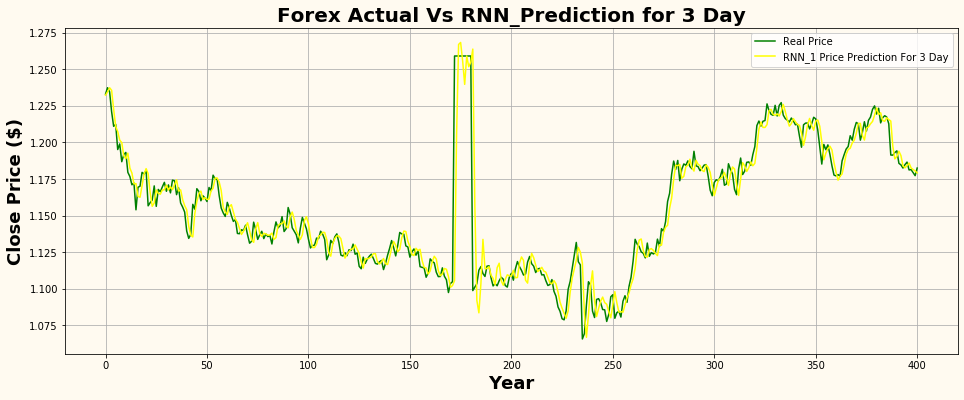

In [40]:
plt.figure(figsize = (16,6), facecolor = '#fffaf0')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fffaf0')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'green', label = 'Real Price')
plt.plot(RNN_1_Price_Prediction_1, color = 'yellow', label = 'RNN_1 Price Prediction For 3 Day')
plt.title('Forex Actual Vs RNN_Prediction for 3 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Year', fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [41]:
print ('R Squared =',r2_score(y_test_1, RNN_1_Price_Prediction_1))

R Squared = 0.8861246907332752


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, RNN_1_Price_Prediction_1)) 

Mean Absolute Error: 0.00712114806927232


In [46]:
#def mean_absolute_percentage_error(y_test_1, RNN_1_Price_Prediction_1): 
    #y_test_1,RNN_1_Price_Prediction_1 = np.array(y_test_1), np.array(RNN_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - RNN_1_Price_Prediction_1) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, RNN_1_Price_Prediction_1))  

In [47]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, RNN_1_Price_Prediction_1))

Mean Squared Error: 0.00020825154422113217


In [48]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, RNN_1_Price_Prediction_1)))

Root Mean Squared Error: 0.014430923193653696


**Build LSTM Model**

In [49]:
#The LSTM Model Build
regressorLSTM_1 = Sequential()

regressorLSTM_1.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(LSTM(units=256))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(Dense(units=1))
regressorLSTM_1.summary()

# Compiling the LSTM
regressorLSTM_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae', 'mse'])

# Fitting to the training set
history_1 = regressorLSTM_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 345,857
Trainable params: 345,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1689/1689 [==============================] - ETA: 59s - loss: 0.2416 - mae: 0.4394 - mse: 0.24 - ETA: 

1689/1689 [==============================] - ETA: 6s - loss: 0.0025 - mae: 0.0380 - mse: 0.002 - ETA: 6s - loss: 0.0028 - mae: 0.0404 - mse: 0.002 - ETA: 6s - loss: 0.0031 - mae: 0.0424 - mse: 0.003 - ETA: 5s - loss: 0.0030 - mae: 0.0423 - mse: 0.003 - ETA: 5s - loss: 0.0031 - mae: 0.0424 - mse: 0.003 - ETA: 5s - loss: 0.0030 - mae: 0.0420 - mse: 0.003 - ETA: 5s - loss: 0.0030 - mae: 0.0418 - mse: 0.003 - ETA: 4s - loss: 0.0030 - mae: 0.0412 - mse: 0.003 - ETA: 4s - loss: 0.0029 - mae: 0.0408 - mse: 0.002 - ETA: 4s - loss: 0.0029 - mae: 0.0405 - mse: 0.002 - ETA: 4s - loss: 0.0031 - mae: 0.0411 - mse: 0.003 - ETA: 3s - loss: 0.0031 - mae: 0.0414 - mse: 0.003 - ETA: 3s - loss: 0.0031 - mae: 0.0415 - mse: 0.003 - ETA: 3s - loss: 0.0034 - mae: 0.0421 - mse: 0.003 - ETA: 3s - loss: 0.0033 - mae: 0.0416 - mse: 0.003 - ETA: 2s - loss: 0.0032 - mae: 0.0412 - mse: 0.003 - ETA: 2s - loss: 0.0032 - mae: 0.0415 - mse: 0.003 - ETA: 2s - loss: 0.0032 - mae: 0.0415 - mse: 0.003 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0025 - mae: 0.0355 - mse: 0.002 - ETA: 6s - loss: 0.0049 - mae: 0.0385 - mse: 0.004 - ETA: 6s - loss: 0.0040 - mae: 0.0379 - mse: 0.004 - ETA: 5s - loss: 0.0038 - mae: 0.0389 - mse: 0.003 - ETA: 5s - loss: 0.0034 - mae: 0.0376 - mse: 0.003 - ETA: 5s - loss: 0.0031 - mae: 0.0363 - mse: 0.003 - ETA: 5s - loss: 0.0031 - mae: 0.0371 - mse: 0.003 - ETA: 4s - loss: 0.0035 - mae: 0.0383 - mse: 0.003 - ETA: 4s - loss: 0.0033 - mae: 0.0382 - mse: 0.003 - ETA: 4s - loss: 0.0032 - mae: 0.0374 - mse: 0.003 - ETA: 4s - loss: 0.0031 - mae: 0.0376 - mse: 0.003 - ETA: 3s - loss: 0.0031 - mae: 0.0379 - mse: 0.003 - ETA: 3s - loss: 0.0031 - mae: 0.0382 - mse: 0.003 - ETA: 3s - loss: 0.0030 - mae: 0.0376 - mse: 0.003 - ETA: 2s - loss: 0.0029 - mae: 0.0375 - mse: 0.002 - ETA: 2s - loss: 0.0030 - mae: 0.0376 - mse: 0.003 - ETA: 2s - loss: 0.0029 - mae: 0.0375 - mse: 0.002 - ETA: 2s - loss: 0.0029 - mae: 0.0372 - mse: 0.002 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0027 - mae: 0.0395 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0370 - mse: 0.002 - ETA: 5s - loss: 0.0021 - mae: 0.0355 - mse: 0.002 - ETA: 5s - loss: 0.0029 - mae: 0.0386 - mse: 0.002 - ETA: 5s - loss: 0.0027 - mae: 0.0376 - mse: 0.002 - ETA: 5s - loss: 0.0034 - mae: 0.0387 - mse: 0.003 - ETA: 4s - loss: 0.0032 - mae: 0.0383 - mse: 0.003 - ETA: 4s - loss: 0.0031 - mae: 0.0380 - mse: 0.003 - ETA: 4s - loss: 0.0031 - mae: 0.0379 - mse: 0.003 - ETA: 4s - loss: 0.0030 - mae: 0.0374 - mse: 0.003 - ETA: 3s - loss: 0.0029 - mae: 0.0372 - mse: 0.002 - ETA: 3s - loss: 0.0029 - mae: 0.0370 - mse: 0.002 - ETA: 3s - loss: 0.0028 - mae: 0.0366 - mse: 0.002 - ETA: 3s - loss: 0.0027 - mae: 0.0361 - mse: 0.002 - ETA: 2s - loss: 0.0027 - mae: 0.0359 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0358 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0359 - mse: 0.002 - ETA: 2s - loss: 0.0027 - mae: 0.0359 - mse: 0.002 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0016 - mae: 0.0308 - mse: 0.001 - ETA: 6s - loss: 0.0015 - mae: 0.0300 - mse: 0.001 - ETA: 6s - loss: 0.0020 - mae: 0.0328 - mse: 0.002 - ETA: 5s - loss: 0.0018 - mae: 0.0322 - mse: 0.001 - ETA: 5s - loss: 0.0025 - mae: 0.0337 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0330 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0335 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0329 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0329 - mse: 0.002 - ETA: 4s - loss: 0.0021 - mae: 0.0324 - mse: 0.002 - ETA: 4s - loss: 0.0020 - mae: 0.0321 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0324 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0324 - mse: 0.002 - ETA: 3s - loss: 0.0020 - mae: 0.0324 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0327 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0325 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0322 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0322 - mse: 0.002 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0023 - mae: 0.0358 - mse: 0.002 - ETA: 6s - loss: 0.0038 - mae: 0.0391 - mse: 0.003 - ETA: 5s - loss: 0.0046 - mae: 0.0378 - mse: 0.004 - ETA: 5s - loss: 0.0039 - mae: 0.0366 - mse: 0.003 - ETA: 5s - loss: 0.0037 - mae: 0.0374 - mse: 0.003 - ETA: 5s - loss: 0.0033 - mae: 0.0366 - mse: 0.003 - ETA: 4s - loss: 0.0032 - mae: 0.0362 - mse: 0.003 - ETA: 4s - loss: 0.0029 - mae: 0.0349 - mse: 0.002 - ETA: 4s - loss: 0.0028 - mae: 0.0346 - mse: 0.002 - ETA: 4s - loss: 0.0026 - mae: 0.0340 - mse: 0.002 - ETA: 3s - loss: 0.0025 - mae: 0.0337 - mse: 0.002 - ETA: 3s - loss: 0.0024 - mae: 0.0332 - mse: 0.002 - ETA: 3s - loss: 0.0023 - mae: 0.0326 - mse: 0.002 - ETA: 3s - loss: 0.0024 - mae: 0.0326 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0325 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0326 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0323 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0321 - mse: 0.002 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0015 - mae: 0.0309 - mse: 0.001 - ETA: 6s - loss: 0.0015 - mae: 0.0301 - mse: 0.001 - ETA: 5s - loss: 0.0034 - mae: 0.0329 - mse: 0.003 - ETA: 5s - loss: 0.0030 - mae: 0.0326 - mse: 0.003 - ETA: 5s - loss: 0.0026 - mae: 0.0309 - mse: 0.002 - ETA: 5s - loss: 0.0026 - mae: 0.0315 - mse: 0.002 - ETA: 4s - loss: 0.0025 - mae: 0.0308 - mse: 0.002 - ETA: 4s - loss: 0.0024 - mae: 0.0311 - mse: 0.002 - ETA: 4s - loss: 0.0023 - mae: 0.0306 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0303 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0304 - mse: 0.002 - ETA: 3s - loss: 0.0023 - mae: 0.0308 - mse: 0.002 - ETA: 3s - loss: 0.0023 - mae: 0.0307 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0304 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0305 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0303 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0304 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0301 - mse: 0.002 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0063 - mae: 0.0456 - mse: 0.006 - ETA: 6s - loss: 0.0039 - mae: 0.0371 - mse: 0.003 - ETA: 5s - loss: 0.0032 - mae: 0.0357 - mse: 0.003 - ETA: 5s - loss: 0.0032 - mae: 0.0364 - mse: 0.003 - ETA: 5s - loss: 0.0029 - mae: 0.0358 - mse: 0.002 - ETA: 5s - loss: 0.0027 - mae: 0.0344 - mse: 0.002 - ETA: 4s - loss: 0.0025 - mae: 0.0336 - mse: 0.002 - ETA: 4s - loss: 0.0024 - mae: 0.0335 - mse: 0.002 - ETA: 4s - loss: 0.0024 - mae: 0.0335 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0328 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0325 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0327 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0328 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0325 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0320 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0318 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0317 - mse: 0.001 - ETA: 2s - loss: 0.0021 - mae: 0.0320 - mse: 0.002 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0012 - mae: 0.0281 - mse: 0.001 - ETA: 6s - loss: 0.0019 - mae: 0.0315 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0310 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0296 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0297 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0292 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0298 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0296 - mse: 0.001 - ETA: 4s - loss: 0.0016 - mae: 0.0290 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0295 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0299 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0292 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0294 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0293 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0296 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0296 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0297 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0296 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0012 - mae: 0.0267 - mse: 0.001 - ETA: 6s - loss: 0.0011 - mae: 0.0265 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0278 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0273 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0265 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0262 - mse: 0.001 - ETA: 4s - loss: 0.0012 - mae: 0.0256 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0260 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0259 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0267 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0271 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0282 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0283 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0283 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0280 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0282 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0284 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0285 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0017 - mae: 0.0324 - mse: 0.001 - ETA: 6s - loss: 0.0016 - mae: 0.0302 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0305 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0284 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0287 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0293 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0295 - mse: 0.001 - ETA: 4s - loss: 0.0020 - mae: 0.0305 - mse: 0.002 - ETA: 4s - loss: 0.0020 - mae: 0.0310 - mse: 0.002 - ETA: 4s - loss: 0.0019 - mae: 0.0302 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0301 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0299 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0296 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0293 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0299 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0296 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0294 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0292 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0049 - mae: 0.0349 - mse: 0.004 - ETA: 6s - loss: 0.0030 - mae: 0.0296 - mse: 0.003 - ETA: 5s - loss: 0.0030 - mae: 0.0296 - mse: 0.003 - ETA: 5s - loss: 0.0027 - mae: 0.0295 - mse: 0.002 - ETA: 5s - loss: 0.0024 - mae: 0.0293 - mse: 0.002 - ETA: 5s - loss: 0.0022 - mae: 0.0289 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0290 - mse: 0.002 - ETA: 4s - loss: 0.0020 - mae: 0.0285 - mse: 0.002 - ETA: 4s - loss: 0.0019 - mae: 0.0283 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0279 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0274 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0272 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0277 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0277 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0279 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0279 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0279 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0279 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0031 - mae: 0.0331 - mse: 0.003 - ETA: 6s - loss: 0.0023 - mae: 0.0303 - mse: 0.002 - ETA: 6s - loss: 0.0017 - mae: 0.0267 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0260 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0263 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0269 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0264 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0257 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0254 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0256 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0250 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0254 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0253 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0251 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0250 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0251 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0014 - mae: 0.0255 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0242 - mse: 0.001 - ETA: 6s - loss: 0.0013 - mae: 0.0256 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0264 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0254 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0253 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0258 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0253 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0257 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0256 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0259 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0263 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0259 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0261 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0260 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0262 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0259 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0260 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0018 - mae: 0.0278 - mse: 0.001 - ETA: 6s - loss: 0.0013 - mae: 0.0258 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0247 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0249 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0251 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0249 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0257 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0258 - mse: 0.001 - ETA: 4s - loss: 0.0012 - mae: 0.0252 - mse: 0.001 - ETA: 4s - loss: 0.0012 - mae: 0.0249 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0251 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0251 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0251 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0256 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0263 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0263 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0259 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0260 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0014 - mae: 0.0240 - mse: 0.001 - ETA: 6s - loss: 0.0010 - mae: 0.0222 - mse: 0.001 - ETA: 6s - loss: 0.0011 - mae: 0.0239 - mse: 0.001 - ETA: 5s - loss: 0.0010 - mae: 0.0235 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0247 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0247 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0251 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0249 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0246 - mse: 0.001 - ETA: 4s - loss: 0.0012 - mae: 0.0246 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0251 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0251 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0250 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0250 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0247 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0246 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0246 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0245 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 9.9765e-04 - mae: 0.0233 - mse: 9.9765e-0 - ETA: 6s - loss: 0.0014 - mae: 0.0284 - mse: 0.0014        - ETA: 5s - loss: 0.0012 - mae: 0.0262 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0259 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0264 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0257 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0263 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0267 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0264 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0263 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0263 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0262 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0264 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0261 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0256 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0261 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0264 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0261 - mse: 0.001 - ETA

1689/1689 [==============================] - ETA: 6s - loss: 8.0903e-04 - mae: 0.0238 - mse: 8.0903e-0 - ETA: 6s - loss: 7.5948e-04 - mae: 0.0224 - mse: 7.5948e-0 - ETA: 6s - loss: 7.5675e-04 - mae: 0.0223 - mse: 7.5675e-0 - ETA: 5s - loss: 0.0019 - mae: 0.0237 - mse: 0.0019        - ETA: 5s - loss: 0.0020 - mae: 0.0246 - mse: 0.002 - ETA: 5s - loss: 0.0019 - mae: 0.0255 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0252 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0248 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0251 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0249 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0257 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0260 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0260 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0254 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0253 - 

1689/1689 [==============================] - ETA: 5s - loss: 0.0012 - mae: 0.0263 - mse: 0.001 - ETA: 5s - loss: 0.0022 - mae: 0.0297 - mse: 0.002 - ETA: 5s - loss: 0.0018 - mae: 0.0277 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0262 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0257 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0247 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0249 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0253 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0258 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0260 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0262 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0258 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0256 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0250 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0246 - mse: 0.001 - ETA: 1s - loss: 0.0

1689/1689 [==============================] - ETA: 6s - loss: 0.0012 - mae: 0.0257 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0248 - mse: 0.001 - ETA: 5s - loss: 0.0010 - mae: 0.0236 - mse: 0.001 - ETA: 5s - loss: 9.4446e-04 - mae: 0.0231 - mse: 9.4446e-0 - ETA: 5s - loss: 0.0012 - mae: 0.0243 - mse: 0.0012        - ETA: 5s - loss: 0.0011 - mae: 0.0241 - mse: 0.001 - ETA: 4s - loss: 0.0011 - mae: 0.0241 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0246 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0247 - mse: 0.001 - ETA: 4s - loss: 0.0012 - mae: 0.0245 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0245 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0252 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0252 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0250 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0249 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0244 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0242 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0244 - mse: 0.001 - ETA

1689/1689 [==============================] - ETA: 6s - loss: 8.3317e-04 - mae: 0.0209 - mse: 8.3317e-0 - ETA: 6s - loss: 0.0025 - mae: 0.0273 - mse: 0.0025        - ETA: 5s - loss: 0.0021 - mae: 0.0269 - mse: 0.002 - ETA: 5s - loss: 0.0019 - mae: 0.0275 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0276 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0269 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0264 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0259 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0258 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0252 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0254 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0258 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0253 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0254 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0254 - mse: 0.001 - ETA

In [50]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-13  1.21923
2018-01-16   1.2184
2018-01-19  1.22366
2018-01-22  1.23103
2018-01-25  1.23923
...             ...
2021-07-14  1.18118
2021-07-17   1.1814
2021-07-20  1.17927
2021-07-23  1.17727
2021-07-26  1.18245

[431 rows x 1 columns]

In [51]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.2329700000000001],
       [1.237317],
       [1.234553],
       [1.220897],
       [1.210962],
       [1.212283],
       [1.1951],
       [1.198926],
       [1.1867889999999999],
       [1.191753],
       [1.1931180000000001],
       [1.1795229999999999],
       [1.176664],
       [1.171015],
       [1.172264],
       [1.153935],
       [1.169317],
       [1.170056],
       [1.1795229999999999],
       [1.178398],
       [1.180777],
       [1.156658],
       [1.1588559999999999],
       [1.160578],
       [1.170275],
       [1.156297],
       [1.167856],
       [1.1662350000000001],
       [1.169591],
       [1.1727040000000002],
       [1.1665889999999999],
       [1.1709459999999998],
       [1.1655149999999999],
       [1.174191],
       [1.17375],
       [1.164293],
       [1.168962],
       [1.158601],
       [1.155802],
       [1.152392],
       [1.139471],
       [1.1344299999999998],
       [1.137139],
       [1.157675],
       [1.154335],
       [1.168361],
       [1

In [52]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.32189849],
       [0.32041211],
       [0.32981451],
       [0.34297393],
       [0.35763581],
       [0.35563492],
       [0.37865765],
       [0.36739014],
       [0.33544558],
       [0.33412893],
       [0.35074346],
       [0.3775125 ],
       [0.35876131],
       [0.34590202],
       [0.33883995],
       [0.32171269],
       [0.33592973],
       [0.36197881],
       [0.34232364],
       [0.34821019],
       [0.34278456],
       [0.3377073 ],
       [0.34965369],
       [0.34560367],
       [0.36041025],
       [0.34164834],
       [0.33983682],
       [0.33249248],
       [0.33603692],
       [0.35393773],
       [0.34644512],
       [0.35421107],
       [0.34927316],
       [0.3248766 ],
       [0.30712763],
       [0.30948761],
       [0.27879003],
       [0.28562522],
       [0.26394236],
       [0.27281059],
       [0.27524917],
       [0.25096159],
       [0.24585396],
       [0.23576197],
       [0.23799332],
       [0.20524841],
       [0.23272848],
       [0.234

In [53]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(401, 30)

In [54]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(401, 30, 1)

In [55]:
LSTM_1_Price_Prediction_1 = regressorLSTM_1.predict(X_test_1)
LSTM_1_Price_Prediction_1 = sc.inverse_transform(LSTM_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

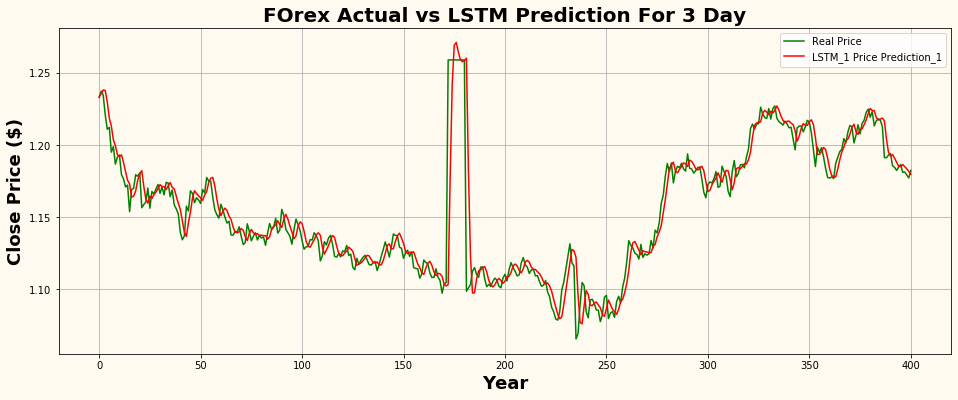

In [56]:
plt.figure(figsize = (16,6), facecolor = '#fffaf0')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fffaf0')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'green', label = 'Real Price')
plt.plot(LSTM_1_Price_Prediction_1, color = 'red', label = 'LSTM_1 Price Prediction_1')
plt.title('FOrex Actual vs LSTM Prediction For 3 Day',fontweight = "bold",fontsize = 20)
plt.xlabel('Year', fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [57]:
print ('R Squared =',r2_score(y_test_1, LSTM_1_Price_Prediction_1))

R Squared = 0.873829342072947


In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, LSTM_1_Price_Prediction_1)) 

Mean Absolute Error: 0.007567400501660286


In [59]:
#def mean_absolute_percentage_error(y_test_1, LSTM_1_Price_Prediction_1): 
    #y_test_1, LSTM_1_Price_Prediction_1 = np.array(y_test_1), np.array(LSTM_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - LSTM_1_Price_Prediction_1) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, LSTM_1_Price_Prediction_1)) 

In [60]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, LSTM_1_Price_Prediction_1))

Mean Squared Error: 0.00023073688684490632


In [61]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, LSTM_1_Price_Prediction_1)))

Root Mean Squared Error: 0.015190025900073584


**Build GRU Model**

In [62]:
#The GRU Model Build
regressorGRU_1 = Sequential()

regressorGRU_1.add(GRU(units=256, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(GRU(units=64))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(Dense(units=1))
regressorGRU_1.summary()

# Compiling the GRU
regressorGRU_1.compile(optimizer='adam',loss='mean_squared_error' , metrics=['mae','mse'])

# Fitting to the training set
history_1 = (regressorGRU_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 30, 256)           198144    
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                61632     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 259,841
Trainable params: 259,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1689/1689 [==============================] - ETA: 1:08 - loss: 0.1495 - mae: 0.3374 - mse: 0.149 - ETA

1689/1689 [==============================] - ETA: 7s - loss: 0.0029 - mae: 0.0381 - mse: 0.002 - ETA: 7s - loss: 0.0024 - mae: 0.0355 - mse: 0.002 - ETA: 7s - loss: 0.0026 - mae: 0.0372 - mse: 0.002 - ETA: 7s - loss: 0.0024 - mae: 0.0361 - mse: 0.002 - ETA: 6s - loss: 0.0025 - mae: 0.0372 - mse: 0.002 - ETA: 6s - loss: 0.0026 - mae: 0.0378 - mse: 0.002 - ETA: 6s - loss: 0.0026 - mae: 0.0376 - mse: 0.002 - ETA: 5s - loss: 0.0030 - mae: 0.0382 - mse: 0.003 - ETA: 5s - loss: 0.0029 - mae: 0.0380 - mse: 0.002 - ETA: 5s - loss: 0.0028 - mae: 0.0379 - mse: 0.002 - ETA: 4s - loss: 0.0027 - mae: 0.0378 - mse: 0.002 - ETA: 4s - loss: 0.0027 - mae: 0.0375 - mse: 0.002 - ETA: 4s - loss: 0.0028 - mae: 0.0378 - mse: 0.002 - ETA: 3s - loss: 0.0028 - mae: 0.0379 - mse: 0.002 - ETA: 3s - loss: 0.0028 - mae: 0.0382 - mse: 0.002 - ETA: 3s - loss: 0.0028 - mae: 0.0382 - mse: 0.002 - ETA: 2s - loss: 0.0028 - mae: 0.0381 - mse: 0.002 - ETA: 2s - loss: 0.0027 - mae: 0.0377 - mse: 0.002 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0017 - mae: 0.0319 - mse: 0.001 - ETA: 7s - loss: 0.0022 - mae: 0.0346 - mse: 0.002 - ETA: 7s - loss: 0.0022 - mae: 0.0344 - mse: 0.002 - ETA: 7s - loss: 0.0025 - mae: 0.0358 - mse: 0.002 - ETA: 6s - loss: 0.0023 - mae: 0.0350 - mse: 0.002 - ETA: 6s - loss: 0.0023 - mae: 0.0345 - mse: 0.002 - ETA: 6s - loss: 0.0022 - mae: 0.0339 - mse: 0.002 - ETA: 5s - loss: 0.0021 - mae: 0.0332 - mse: 0.002 - ETA: 5s - loss: 0.0020 - mae: 0.0329 - mse: 0.002 - ETA: 5s - loss: 0.0021 - mae: 0.0329 - mse: 0.002 - ETA: 4s - loss: 0.0021 - mae: 0.0329 - mse: 0.002 - ETA: 4s - loss: 0.0021 - mae: 0.0330 - mse: 0.002 - ETA: 4s - loss: 0.0020 - mae: 0.0327 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0331 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0331 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0333 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0336 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0335 - mse: 0.002 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0019 - mae: 0.0335 - mse: 0.001 - ETA: 8s - loss: 0.0015 - mae: 0.0302 - mse: 0.001 - ETA: 7s - loss: 0.0021 - mae: 0.0344 - mse: 0.002 - ETA: 7s - loss: 0.0021 - mae: 0.0353 - mse: 0.002 - ETA: 7s - loss: 0.0024 - mae: 0.0352 - mse: 0.002 - ETA: 6s - loss: 0.0025 - mae: 0.0358 - mse: 0.002 - ETA: 6s - loss: 0.0024 - mae: 0.0359 - mse: 0.002 - ETA: 6s - loss: 0.0024 - mae: 0.0359 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0355 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0350 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0350 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0345 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0343 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0345 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0342 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0347 - mse: 0.002 - ETA: 3s - loss: 0.0023 - mae: 0.0345 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0345 - mse: 0.002 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0020 - mae: 0.0339 - mse: 0.002 - ETA: 7s - loss: 0.0021 - mae: 0.0343 - mse: 0.002 - ETA: 7s - loss: 0.0030 - mae: 0.0356 - mse: 0.003 - ETA: 6s - loss: 0.0025 - mae: 0.0331 - mse: 0.002 - ETA: 6s - loss: 0.0028 - mae: 0.0336 - mse: 0.002 - ETA: 6s - loss: 0.0025 - mae: 0.0319 - mse: 0.002 - ETA: 6s - loss: 0.0024 - mae: 0.0319 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0313 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0317 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0318 - mse: 0.002 - ETA: 4s - loss: 0.0024 - mae: 0.0327 - mse: 0.002 - ETA: 4s - loss: 0.0024 - mae: 0.0329 - mse: 0.002 - ETA: 4s - loss: 0.0023 - mae: 0.0329 - mse: 0.002 - ETA: 3s - loss: 0.0023 - mae: 0.0329 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0323 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0320 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0322 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0322 - mse: 0.002 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0014 - mae: 0.0298 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0292 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0283 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0309 - mse: 0.001 - ETA: 6s - loss: 0.0017 - mae: 0.0305 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0305 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0304 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0311 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0314 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0313 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0312 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0306 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0307 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0304 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0302 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0302 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0311 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0307 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0019 - mae: 0.0320 - mse: 0.001 - ETA: 7s - loss: 0.0017 - mae: 0.0306 - mse: 0.001 - ETA: 7s - loss: 0.0016 - mae: 0.0292 - mse: 0.001 - ETA: 6s - loss: 0.0017 - mae: 0.0291 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0302 - mse: 0.001 - ETA: 6s - loss: 0.0024 - mae: 0.0306 - mse: 0.002 - ETA: 6s - loss: 0.0024 - mae: 0.0312 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0307 - mse: 0.002 - ETA: 5s - loss: 0.0021 - mae: 0.0300 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0310 - mse: 0.002 - ETA: 4s - loss: 0.0023 - mae: 0.0308 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0309 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0308 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0308 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0306 - mse: 0.002 - ETA: 3s - loss: 0.0022 - mae: 0.0308 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0310 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0311 - mse: 0.002 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0023 - mae: 0.0304 - mse: 0.002 - ETA: 7s - loss: 0.0018 - mae: 0.0283 - mse: 0.001 - ETA: 7s - loss: 0.0017 - mae: 0.0286 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0291 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0293 - mse: 0.001 - ETA: 6s - loss: 0.0017 - mae: 0.0287 - mse: 0.001 - ETA: 6s - loss: 0.0017 - mae: 0.0291 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0297 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0295 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0288 - mse: 0.001 - ETA: 4s - loss: 0.0016 - mae: 0.0287 - mse: 0.001 - ETA: 4s - loss: 0.0016 - mae: 0.0284 - mse: 0.001 - ETA: 4s - loss: 0.0016 - mae: 0.0287 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0285 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0288 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0291 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0297 - mse: 0.001 - ETA: 2s - loss: 0.0021 - mae: 0.0308 - mse: 0.002 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0015 - mae: 0.0284 - mse: 0.001 - ETA: 7s - loss: 0.0014 - mae: 0.0272 - mse: 0.001 - ETA: 7s - loss: 0.0012 - mae: 0.0254 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0262 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0260 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0257 - mse: 0.001 - ETA: 6s - loss: 0.0013 - mae: 0.0266 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0270 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0269 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0267 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0265 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0266 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0275 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0278 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0278 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0281 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0286 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0015 - mae: 0.0298 - mse: 0.001 - ETA: 7s - loss: 0.0023 - mae: 0.0302 - mse: 0.002 - ETA: 7s - loss: 0.0028 - mae: 0.0312 - mse: 0.002 - ETA: 6s - loss: 0.0025 - mae: 0.0307 - mse: 0.002 - ETA: 6s - loss: 0.0023 - mae: 0.0306 - mse: 0.002 - ETA: 6s - loss: 0.0021 - mae: 0.0299 - mse: 0.002 - ETA: 5s - loss: 0.0019 - mae: 0.0292 - mse: 0.001 - ETA: 5s - loss: 0.0019 - mae: 0.0293 - mse: 0.001 - ETA: 5s - loss: 0.0019 - mae: 0.0294 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0294 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0288 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0295 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0294 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0289 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0291 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0289 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0289 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0286 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0063 - mae: 0.0324 - mse: 0.006 - ETA: 7s - loss: 0.0038 - mae: 0.0302 - mse: 0.003 - ETA: 7s - loss: 0.0038 - mae: 0.0330 - mse: 0.003 - ETA: 6s - loss: 0.0034 - mae: 0.0322 - mse: 0.003 - ETA: 6s - loss: 0.0033 - mae: 0.0328 - mse: 0.003 - ETA: 6s - loss: 0.0030 - mae: 0.0316 - mse: 0.003 - ETA: 6s - loss: 0.0028 - mae: 0.0310 - mse: 0.002 - ETA: 5s - loss: 0.0026 - mae: 0.0306 - mse: 0.002 - ETA: 5s - loss: 0.0024 - mae: 0.0298 - mse: 0.002 - ETA: 5s - loss: 0.0023 - mae: 0.0293 - mse: 0.002 - ETA: 4s - loss: 0.0022 - mae: 0.0289 - mse: 0.002 - ETA: 4s - loss: 0.0021 - mae: 0.0286 - mse: 0.002 - ETA: 4s - loss: 0.0021 - mae: 0.0291 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0290 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0291 - mse: 0.002 - ETA: 3s - loss: 0.0021 - mae: 0.0292 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0289 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0289 - mse: 0.002 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0018 - mae: 0.0289 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0257 - mse: 0.001 - ETA: 7s - loss: 0.0011 - mae: 0.0236 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0250 - mse: 0.001 - ETA: 6s - loss: 0.0013 - mae: 0.0252 - mse: 0.001 - ETA: 6s - loss: 0.0013 - mae: 0.0261 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0254 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0258 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0267 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0267 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0269 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0268 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0263 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0265 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0265 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0262 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0264 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0010 - mae: 0.0228 - mse: 0.001 - ETA: 7s - loss: 0.0011 - mae: 0.0225 - mse: 0.001 - ETA: 7s - loss: 0.0012 - mae: 0.0243 - mse: 0.001 - ETA: 6s - loss: 0.0013 - mae: 0.0251 - mse: 0.001 - ETA: 6s - loss: 0.0015 - mae: 0.0261 - mse: 0.001 - ETA: 6s - loss: 0.0014 - mae: 0.0262 - mse: 0.001 - ETA: 5s - loss: 0.0020 - mae: 0.0274 - mse: 0.002 - ETA: 5s - loss: 0.0019 - mae: 0.0270 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0268 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0269 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0267 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0265 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0267 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0268 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0267 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0271 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0274 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0018 - mae: 0.0296 - mse: 0.001 - ETA: 7s - loss: 0.0014 - mae: 0.0276 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0261 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0261 - mse: 0.001 - ETA: 7s - loss: 0.0012 - mae: 0.0254 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0259 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0254 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0250 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0253 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0257 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0262 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0262 - mse: 0.001 - ETA: 4s - loss: 0.0016 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0016 - mae: 0.0267 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0265 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0261 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0260 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0259 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 8s - loss: 0.0039 - mae: 0.0356 - mse: 0.003 - ETA: 8s - loss: 0.0033 - mae: 0.0331 - mse: 0.003 - ETA: 8s - loss: 0.0025 - mae: 0.0293 - mse: 0.002 - ETA: 7s - loss: 0.0021 - mae: 0.0277 - mse: 0.002 - ETA: 7s - loss: 0.0019 - mae: 0.0275 - mse: 0.001 - ETA: 6s - loss: 0.0019 - mae: 0.0275 - mse: 0.001 - ETA: 6s - loss: 0.0018 - mae: 0.0272 - mse: 0.001 - ETA: 6s - loss: 0.0017 - mae: 0.0271 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0269 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0267 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0264 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0264 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0266 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0266 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0269 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0267 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0014 - mae: 0.0262 - mse: 0.001 - ETA: 7s - loss: 0.0017 - mae: 0.0248 - mse: 0.001 - ETA: 7s - loss: 0.0014 - mae: 0.0235 - mse: 0.001 - ETA: 6s - loss: 0.0014 - mae: 0.0231 - mse: 0.001 - ETA: 6s - loss: 0.0016 - mae: 0.0251 - mse: 0.001 - ETA: 6s - loss: 0.0014 - mae: 0.0240 - mse: 0.001 - ETA: 6s - loss: 0.0014 - mae: 0.0238 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0246 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0255 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0253 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0249 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0256 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0255 - mse: 0.001 - ETA: 3s - loss: 0.0018 - mae: 0.0254 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0251 - mse: 0.001 - ETA: 3s - loss: 0.0017 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0257 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0254 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 7.8024e-04 - mae: 0.0222 - mse: 7.8024e-0 - ETA: 7s - loss: 0.0013 - mae: 0.0273 - mse: 0.0013        - ETA: 7s - loss: 0.0012 - mae: 0.0271 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0267 - mse: 0.001 - ETA: 6s - loss: 0.0015 - mae: 0.0280 - mse: 0.001 - ETA: 6s - loss: 0.0015 - mae: 0.0276 - mse: 0.001 - ETA: 6s - loss: 0.0015 - mae: 0.0274 - mse: 0.001 - ETA: 5s - loss: 0.0015 - mae: 0.0279 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0276 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0272 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0271 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0272 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0272 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0275 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0273 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0270 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0274 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0276 - mse: 0.001 - ETA

1689/1689 [==============================] - ETA: 7s - loss: 0.0011 - mae: 0.0264 - mse: 0.001 - ETA: 7s - loss: 0.0018 - mae: 0.0293 - mse: 0.001 - ETA: 7s - loss: 0.0027 - mae: 0.0292 - mse: 0.002 - ETA: 6s - loss: 0.0024 - mae: 0.0287 - mse: 0.002 - ETA: 6s - loss: 0.0021 - mae: 0.0278 - mse: 0.002 - ETA: 6s - loss: 0.0019 - mae: 0.0268 - mse: 0.001 - ETA: 5s - loss: 0.0019 - mae: 0.0270 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0268 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0265 - mse: 0.001 - ETA: 5s - loss: 0.0016 - mae: 0.0266 - mse: 0.001 - ETA: 4s - loss: 0.0018 - mae: 0.0268 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0268 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0264 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0263 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0263 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0263 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0263 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0261 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0013 - mae: 0.0275 - mse: 0.001 - ETA: 7s - loss: 0.0014 - mae: 0.0286 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0270 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0259 - mse: 0.001 - ETA: 6s - loss: 0.0011 - mae: 0.0255 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0257 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0253 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0256 - mse: 0.001 - ETA: 5s - loss: 0.0012 - mae: 0.0255 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0259 - mse: 0.001 - ETA: 4s - loss: 0.0014 - mae: 0.0258 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0253 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0250 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0246 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0245 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0245 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0247 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0249 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 0.0015 - mae: 0.0282 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0267 - mse: 0.001 - ETA: 7s - loss: 0.0013 - mae: 0.0276 - mse: 0.001 - ETA: 6s - loss: 0.0012 - mae: 0.0266 - mse: 0.001 - ETA: 6s - loss: 0.0014 - mae: 0.0267 - mse: 0.001 - ETA: 6s - loss: 0.0014 - mae: 0.0264 - mse: 0.001 - ETA: 6s - loss: 0.0013 - mae: 0.0260 - mse: 0.001 - ETA: 5s - loss: 0.0013 - mae: 0.0261 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0261 - mse: 0.001 - ETA: 5s - loss: 0.0014 - mae: 0.0259 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0258 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0256 - mse: 0.001 - ETA: 4s - loss: 0.0013 - mae: 0.0254 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0256 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0258 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0257 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0260 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0257 - mse: 0.001 - ETA: 2s - loss: 0.0

1689/1689 [==============================] - ETA: 7s - loss: 8.7135e-04 - mae: 0.0225 - mse: 8.7135e-0 - ETA: 7s - loss: 7.4527e-04 - mae: 0.0214 - mse: 7.4527e-0 - ETA: 7s - loss: 7.2959e-04 - mae: 0.0208 - mse: 7.2959e-0 - ETA: 7s - loss: 7.8963e-04 - mae: 0.0208 - mse: 7.8963e-0 - ETA: 6s - loss: 0.0010 - mae: 0.0222 - mse: 0.0010        - ETA: 6s - loss: 0.0020 - mae: 0.0241 - mse: 0.002 - ETA: 6s - loss: 0.0019 - mae: 0.0238 - mse: 0.001 - ETA: 5s - loss: 0.0018 - mae: 0.0242 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0241 - mse: 0.001 - ETA: 5s - loss: 0.0017 - mae: 0.0243 - mse: 0.001 - ETA: 4s - loss: 0.0017 - mae: 0.0248 - mse: 0.001 - ETA: 4s - loss: 0.0016 - mae: 0.0243 - mse: 0.001 - ETA: 4s - loss: 0.0015 - mae: 0.0242 - mse: 0.001 - ETA: 3s - loss: 0.0016 - mae: 0.0247 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0246 - mse: 0.001 - ETA: 3s - loss: 0.0015 - mae: 0.0242 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0245 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0

In [63]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-13  1.21923
2018-01-16   1.2184
2018-01-19  1.22366
2018-01-22  1.23103
2018-01-25  1.23923
...             ...
2021-07-14  1.18118
2021-07-17   1.1814
2021-07-20  1.17927
2021-07-23  1.17727
2021-07-26  1.18245

[431 rows x 1 columns]

In [64]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.2329700000000001],
       [1.237317],
       [1.234553],
       [1.220897],
       [1.210962],
       [1.212283],
       [1.1951],
       [1.198926],
       [1.1867889999999999],
       [1.191753],
       [1.1931180000000001],
       [1.1795229999999999],
       [1.176664],
       [1.171015],
       [1.172264],
       [1.153935],
       [1.169317],
       [1.170056],
       [1.1795229999999999],
       [1.178398],
       [1.180777],
       [1.156658],
       [1.1588559999999999],
       [1.160578],
       [1.170275],
       [1.156297],
       [1.167856],
       [1.1662350000000001],
       [1.169591],
       [1.1727040000000002],
       [1.1665889999999999],
       [1.1709459999999998],
       [1.1655149999999999],
       [1.174191],
       [1.17375],
       [1.164293],
       [1.168962],
       [1.158601],
       [1.155802],
       [1.152392],
       [1.139471],
       [1.1344299999999998],
       [1.137139],
       [1.157675],
       [1.154335],
       [1.168361],
       [1

In [65]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.32189849],
       [0.32041211],
       [0.32981451],
       [0.34297393],
       [0.35763581],
       [0.35563492],
       [0.37865765],
       [0.36739014],
       [0.33544558],
       [0.33412893],
       [0.35074346],
       [0.3775125 ],
       [0.35876131],
       [0.34590202],
       [0.33883995],
       [0.32171269],
       [0.33592973],
       [0.36197881],
       [0.34232364],
       [0.34821019],
       [0.34278456],
       [0.3377073 ],
       [0.34965369],
       [0.34560367],
       [0.36041025],
       [0.34164834],
       [0.33983682],
       [0.33249248],
       [0.33603692],
       [0.35393773],
       [0.34644512],
       [0.35421107],
       [0.34927316],
       [0.3248766 ],
       [0.30712763],
       [0.30948761],
       [0.27879003],
       [0.28562522],
       [0.26394236],
       [0.27281059],
       [0.27524917],
       [0.25096159],
       [0.24585396],
       [0.23576197],
       [0.23799332],
       [0.20524841],
       [0.23272848],
       [0.234

In [66]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape  

(401, 30)

In [67]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(401, 30, 1)

In [68]:
GRU_1_Price_Prediction_1 = regressorGRU_1.predict(X_test_1)
GRU_1_Price_Prediction_1 = sc.inverse_transform(GRU_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

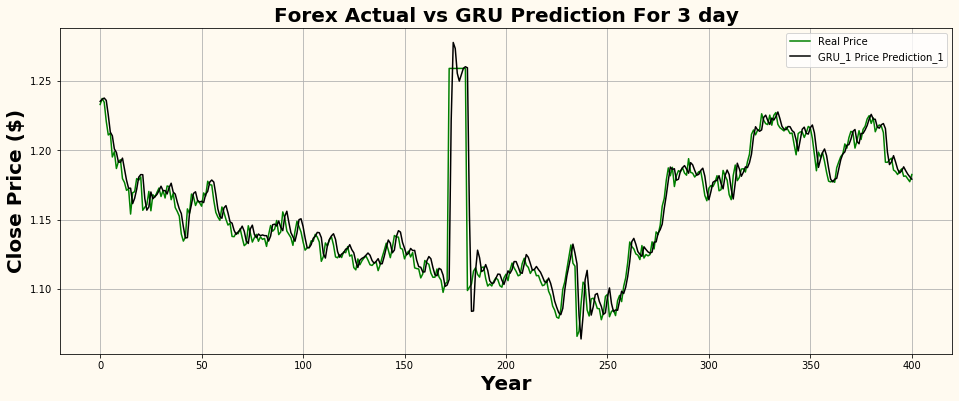

In [69]:
plt.figure(figsize = (16,6), facecolor = '#fffaf0')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fffaf0')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'green', label = 'Real Price')
plt.plot(GRU_1_Price_Prediction_1, color = 'black', label = 'GRU_1 Price Prediction_1')
plt.title('Forex Actual vs GRU Prediction For 3 day',fontweight = "bold",fontsize = 20)
plt.xlabel('Year', fontsize = 20,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 20,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [70]:
print ('R Squared =',r2_score(y_test_1, GRU_1_Price_Prediction_1))

R Squared = 0.8900569521885848


In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, GRU_1_Price_Prediction_1)) 

Mean Absolute Error: 0.007171778060684781


In [72]:
#def mean_absolute_percentage_error(y_test_1, GRU_1_Price_Prediction_1): 
    #y_test_1, GRU_1_Price_Prediction_1 = np.array(y_test_1), np.array(GRU_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - GRU_1_Price_Prediction_1) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, GRU_1_Price_Prediction_1)) 

In [73]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, GRU_1_Price_Prediction_1))

Mean Squared Error: 0.0002010603495221004


In [74]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, GRU_1_Price_Prediction_1)))

Root Mean Squared Error: 0.014179575082565076


#**The End of 3 Days Price Prediction**